<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/LinaerRegression_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity to do:**

1. Display the coefficients and intercept
2. Implement Linear Regression on Boston Housing Data to demonstrate multiple linear regression
3. Use the obtained coefficent and intecept to compute new_pressure for new_temperature = 40 and verify the result by executing the relevant code block
4. Implement other evaluation metrics: MSE, RMSE, RelMSE and CV



CRIM: -0.11305592398537989
ZN: 0.030110464145648292
INDUS: 0.04038072041333043
CHAS: 2.7844382035079276
NOX: -17.202633391781117
RM: 4.43883519951305
AGE: -0.006296362210980761
DIS: -1.447865368530786
RAD: 0.26242973558509075
TAX: -0.010646786275308524
PTRATIO: -0.915456240468073
B: 0.012351334729969077
LSTAT: -0.5085714244487918
Intercept: 30.2468

MAE: 3.1891
MSE: 24.2911
RMSE: 4.9286
RelMSE: 0.0526
CV: 0.2294

Predicted price when RM=40 (model): 172.1422
Manual prediction: 172.1422


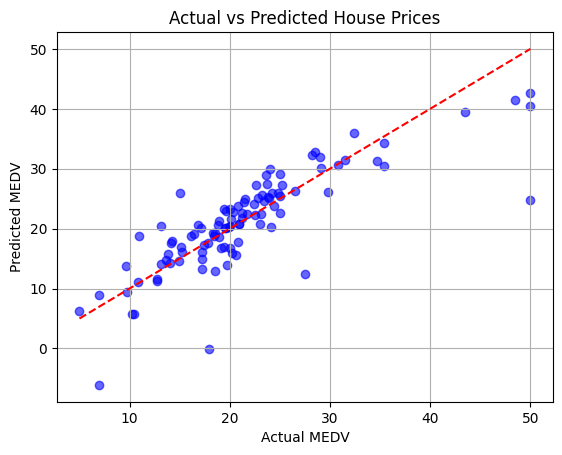

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split

boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data.astype(float)
y = boston.target.astype(float).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

for f, c in zip(X.columns, model.coef_):
    print(f"{f}: {c}")
print(f"Intercept: {model.intercept_:.4f}")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rel_mse = mse / (np.mean(y_test) ** 2)
cv = rmse / np.mean(y_test)

print(f"\nMAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RelMSE: {rel_mse:.4f}")
print(f"CV: {cv:.4f}")

new_input = pd.DataFrame([X.mean()], columns=X.columns)
new_input.at[0, 'RM'] = 40

new_pred = model.predict(new_input)[0]
manual_pred = new_input.values.dot(model.coef_) + model.intercept_

print(f"\nPredicted price when RM=40 (model): {new_pred:.4f}")
print(f"Manual prediction: {manual_pred[0]:.4f}")

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
